In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')
# to remove warning calls/emitted
from sklearn.metrics import accuracy_score, plot_confusion_matrix
FIGURE_SIZE = (15, 12)
SNS_FIGURE_SIZE = (20, 15)

In [2]:
df = pd.read_excel('./datasets/combined.xlsx', index_col=0)

In [3]:
df.head()

,Dwelling Type,Year,Month,Region,Towns,Avg kWh,Daily Rainfall Total (mm),Highest 30 min Rainfall (mm),Highest 60 min Rainfall (mm),Highest 120 min Rainfall (mm),Mean Temperature (°C),Maximum Temperature (°C),Minimum Temperature (°C),Mean Wind Speed (km/h),Max Wind Speed (km/h)
0,1-room / 2-room,2005,1,Central Region,Bishan,104.9,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
1,1-room / 2-room,2005,1,Central Region,Bukit Merah,140.7,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
2,1-room / 2-room,2005,1,Central Region,Central Region,136.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
3,1-room / 2-room,2005,1,Central Region,Geylang,148.5,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3
4,1-room / 2-room,2005,1,Central Region,Kallang,115.6,2.9,3.6,4.4,5.0,27.5,31.3,25.1,7.2,35.3


In [4]:
df.isna().sum()

Dwelling Type                    0
Year                             0
Month                            0
Region                           0
Towns                            0
Avg kWh                          0
Daily Rainfall Total (mm)        0
Highest 30 min Rainfall (mm)     0
Highest 60 min Rainfall (mm)     0
Highest 120 min Rainfall (mm)    0
Mean Temperature (°C)            0
Maximum Temperature (°C)         0
Minimum Temperature (°C)         0
Mean Wind Speed (km/h)           0
Max Wind Speed (km/h)            0
dtype: int64

<AxesSubplot:>

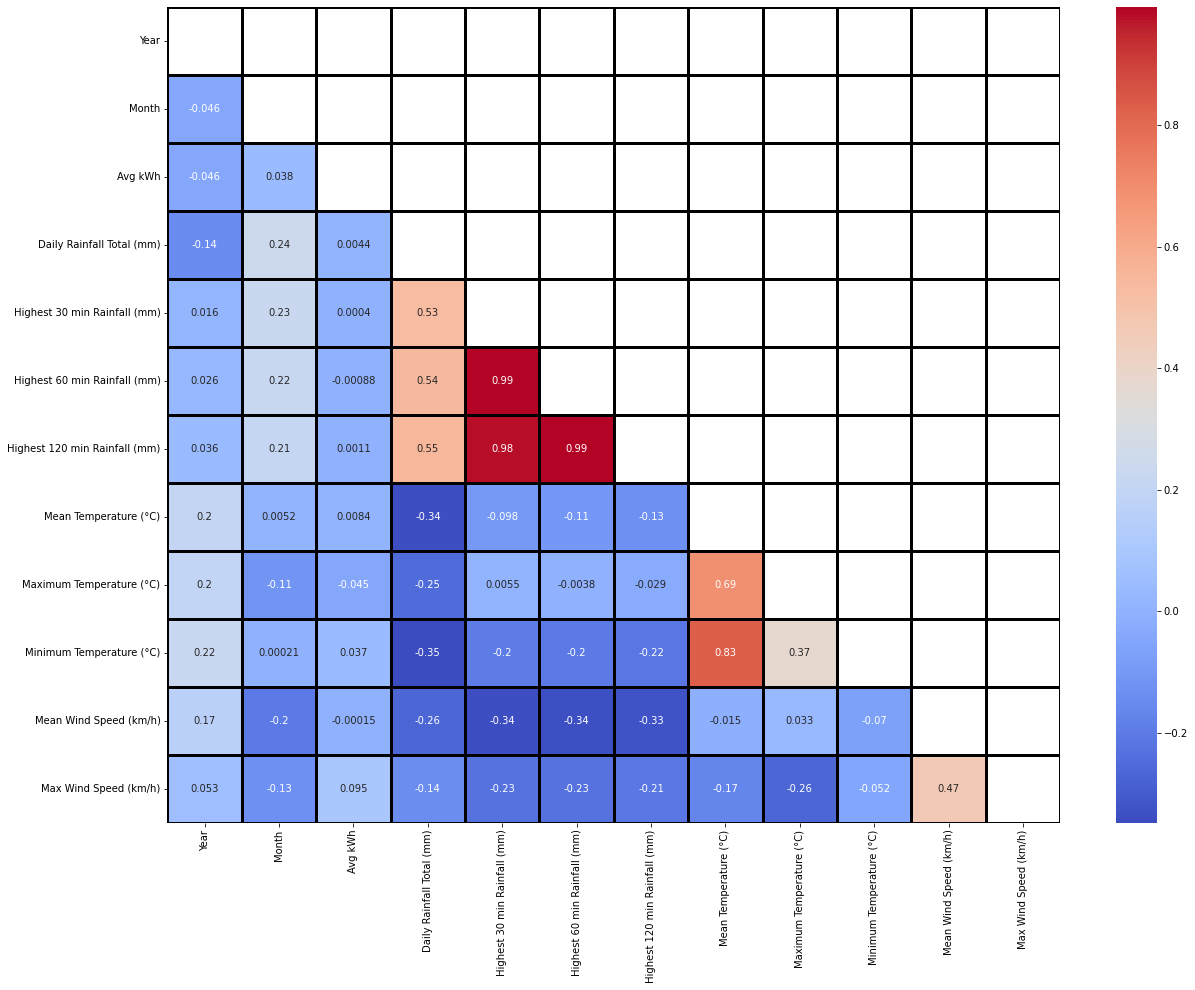

In [5]:
fig, ax = plt.subplots(figsize=SNS_FIGURE_SIZE)
mask_matrix = np.triu(df.corr())
sns.heatmap(df.corr(), annot = True, cmap= 'coolwarm', linewidths=3, linecolor='black', mask=mask_matrix)

# We define variables with high correlation to be 0.9 and above for this project. A total of 3 variables is identified.

# We will try to use each of these 3 variables to see which one predicts the best for us

# One Hot Encoding

In [6]:
df_one_hot_encoded_1hour = df.copy()
df_one_hot_encoded_2hour = df.copy()
df_one_hot_encoded_30min = df.copy()
df_encoded = df.copy()
features_df_1hour = pd.get_dummies(df_one_hot_encoded_1hour, columns=['Dwelling Type', 'Month', 'Towns', 'Region'])
features_df_2hour = pd.get_dummies(df_one_hot_encoded_2hour, columns=['Dwelling Type', 'Month', 'Towns', 'Region'])
features_df_30min = pd.get_dummies(df_one_hot_encoded_30min, columns=['Dwelling Type', 'Month', 'Towns', 'Region'])

# Normalize Data

In [7]:
features_df_1hour.drop('Highest 30 min Rainfall (mm)', axis=1,inplace=True)
features_df_1hour.drop('Highest 120 min Rainfall (mm)', axis=1,inplace=True)

In [8]:
features_df_2hour.drop('Highest 60 min Rainfall (mm)', axis=1,inplace=True)
features_df_2hour.drop('Highest 30 min Rainfall (mm)', axis=1,inplace=True)

In [9]:
features_df_30min.drop('Highest 60 min Rainfall (mm)', axis=1,inplace=True)
features_df_30min.drop('Highest 120 min Rainfall (mm)', axis=1,inplace=True)

In [10]:
df_min_max_scaled_1hour = features_df_1hour.copy()
# apply normalization techniques
for column in df_min_max_scaled_1hour.columns:
    df_min_max_scaled_1hour[column] = (df_min_max_scaled_1hour[column] - df_min_max_scaled_1hour[column].min()) / (df_min_max_scaled_1hour[column].max() - df_min_max_scaled_1hour[column].min())
    
df_min_max_scaled_2hour = features_df_2hour.copy()
# apply normalization techniques
for column in df_min_max_scaled_2hour.columns:
    df_min_max_scaled_2hour[column] = (df_min_max_scaled_2hour[column] - df_min_max_scaled_2hour[column].min()) / (df_min_max_scaled_2hour[column].max() - df_min_max_scaled_2hour[column].min()) 
    
df_min_max_scaled_30min = features_df_30min.copy()
# apply normalization techniques
for column in df_min_max_scaled_30min.columns:
    df_min_max_scaled_30min[column] = (df_min_max_scaled_30min[column] - df_min_max_scaled_30min[column].min()) / (df_min_max_scaled_30min[column].max() - df_min_max_scaled_30min[column].min()) 

# Split to train and test

In [11]:
X_1hour = df_min_max_scaled_1hour.loc[:, df_min_max_scaled_1hour.columns !='Avg kWh']
y_1hour = df_encoded['Avg kWh']

X_2hour = df_min_max_scaled_2hour.loc[:, df_min_max_scaled_2hour.columns !='Avg kWh']
y_2hour = df_encoded['Avg kWh']

X_30min = df_min_max_scaled_30min.loc[:, df_min_max_scaled_30min.columns !='Avg kWh']
y_30min = df_encoded['Avg kWh']

In [12]:
X_train_1hour, X_test_1hour, y_train_1hour, y_test_1hour = train_test_split(X_1hour, y_1hour, test_size=0.2, random_state=0)
X_train_2hour, X_test_2hour, y_train_2hour, y_test_2hour = train_test_split(X_2hour, y_2hour, test_size=0.2, random_state=0)
X_train_30min, X_test_30min, y_train_30min, y_test_30min = train_test_split(X_30min, y_30min, test_size=0.2, random_state=0)

In [13]:
rmse_loss = lambda y, y_pred: np.sqrt(mean_squared_error(y, y_pred))

models = [
           ['Linear Regression', LinearRegression()],
           ['Desicion Tree Regressor', DecisionTreeRegressor()],
           ['KNeighbors Regressor',  KNeighborsRegressor()],
         ]

Try using 60 minutes rainfall

In [14]:
metric_data = []        
for name, curr_model in models :
    curr_model_data = []
    curr_model_data.append(name)
    curr_model.fit(X_train_1hour, y_train_1hour)
    curr_model_data.append(round(rmse_loss(y_train_1hour, curr_model.predict(X_train_1hour)),6))
    curr_model_data.append(round(r2_score(y_train_1hour, curr_model.predict(X_train_1hour)),6))
    curr_model_data.append(round(rmse_loss(y_test_1hour,curr_model.predict(X_test_1hour)),6))
    curr_model_data.append(round(r2_score(y_test_1hour,curr_model.predict(X_test_1hour)),6))
    metric_data.append(curr_model_data)

model_res_df = pd.DataFrame(metric_data, columns=['Models', 'Train RMSE Score', 'Train R^2 Score', 'Test RMSE Score', 'Test R^2 Score'])
model_res_df

,Models,Train RMSE Score,Train R^2 Score,Test RMSE Score,Test R^2 Score
0,Linear Regression,219.604100,0.740220,217.696735,0.734999
1,Desicion Tree Regressor,0.000000,1.000000,92.946917,0.951693
2,KNeighbors Regressor,75.988877,0.968895,90.936930,0.953759


Try using 120 minutes rainfall

In [15]:
metric_data = []        
for name, curr_model in models :
    curr_model_data = []
    curr_model_data.append(name)
    curr_model.fit(X_train_2hour, y_train_2hour)
    curr_model_data.append(round(rmse_loss(y_train_2hour, curr_model.predict(X_train_2hour)),6))
    curr_model_data.append(round(r2_score(y_train_2hour, curr_model.predict(X_train_2hour)),6))
    curr_model_data.append(round(rmse_loss(y_test_2hour,curr_model.predict(X_test_2hour)),6))
    curr_model_data.append(round(r2_score(y_test_2hour,curr_model.predict(X_test_2hour)),6))
    metric_data.append(curr_model_data)

model_res_df = pd.DataFrame(metric_data, columns=['Models', 'Train RMSE Score', 'Train R^2 Score', 'Test RMSE Score', 'Test R^2 Score'])
model_res_df

,Models,Train RMSE Score,Train R^2 Score,Test RMSE Score,Test R^2 Score
0,Linear Regression,219.597396,0.740236,217.714058,0.734957
1,Desicion Tree Regressor,0.000000,1.000000,97.261109,0.947104
2,KNeighbors Regressor,76.040227,0.968853,90.570360,0.954131


Try using 30 minutes rainfall

In [16]:
metric_data = []        
for name, curr_model in models :
    curr_model_data = []
    curr_model_data.append(name)
    curr_model.fit(X_train_30min, y_train_30min)
    curr_model_data.append(round(rmse_loss(y_train_30min, curr_model.predict(X_train_30min)),6))
    curr_model_data.append(round(rmse_loss(y_test_30min,curr_model.predict(X_test_30min)),6))
    curr_model_data.append(round(r2_score(y_train_30min, curr_model.predict(X_train_30min)),6))
    curr_model_data.append(round(r2_score(y_test_30min,curr_model.predict(X_test_30min)),6))
    metric_data.append(curr_model_data)

model_res_df = pd.DataFrame(metric_data, columns=['Models', 'Train RMSE Score', 'Train R^2 Score', 'Test RMSE Score', 'Test R^2 Score'])
model_res_df

,Models,Train RMSE Score,Train R^2 Score,Test RMSE Score,Test R^2 Score
0,Linear Regression,219.596363,217.707954,0.740239,0.734972
1,Desicion Tree Regressor,0.000000,86.537225,1.000000,0.958126
2,KNeighbors Regressor,76.053692,90.435289,0.968842,0.954268


There is not much difference in the RMSE,R^2, Test_RMSE, and Test R^2 score.
We have decided to proceed with only one of the variable to prevent the isuse of multi-collinearity. From here, we select <b> 120 minutes rainfall </b> features and will continue with it.